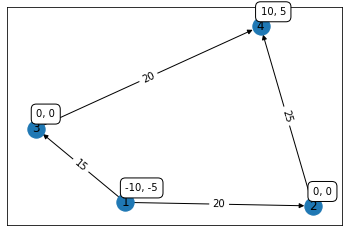

In [1]:
from gurobipy import *
import networkx as nx
import matplotlib.pyplot as plt

# Sample data
nodes = [1, 2, 3, 4]
arcs = [(1, 2), (1, 3), (2, 4), (3, 4)]
commodities = [1, 2]
capacities = {(1, 2): 20, (1, 3): 15, (2, 4): 25, (3, 4): 20}
costs = {(1, 2, 1): 2, (1, 2, 2): 3, (1, 3, 1): 3, (1, 3, 2): 2, (2, 4, 1): 1, (2, 4, 2): 2, (3, 4, 1): 2, (3, 4, 2): 1}
demands = {(1, 1): -10, (1, 2): -5, (2, 1): 0, (2, 2): 0, (3, 1): 0, (3, 2): 0, (4, 1): 10, (4, 2): 5}


# Plot network
G = nx.DiGraph()
for i in nodes:
    G.add_node(i)
for i, j in arcs:
    G.add_edge(i, j, capacity=capacities[i, j], weight=costs[i, j, 1])
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
for i in nodes:
    plt.text(pos[i][0], pos[i][1] + 0.1, f"{demands[i, 1]}, {demands[i, 2]}", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()





In [2]:
# Create model
m = Model()

# Add variables
f = {}
for i, j in arcs:
    for k in commodities:
        f[i, j, k] = m.addVar(vtype=GRB.INTEGER, name=f"f_{i}_{j}_{k}")

# Add constraints
#for i, j in arcs:
    #m.addConstr(sum(f[i, j, k] for k in commodities) <= capacities[i, j])

for i in nodes:
    for k in commodities:
        m.addConstr(sum(f[i, j, k] for j in nodes if (i, j) in arcs) - sum(f[j, i, k] for j in nodes if (j, i) in arcs) == -demands[i, k])

# Set objective
m.setObjective(sum(costs[i, j, k] * f[i, j, k] for i, j in arcs for k in commodities), GRB.MINIMIZE)

# Optimize model
m.optimize()



Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-04
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 8 columns and 16 nonzeros
Model fingerprint: 0xcb703667
Variable types: 0 continuous, 8 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 1e+01]
Presolve removed 8 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 45 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.500000000000e+01, best bound 4.500000000000e+01, gap 0.0000%


In [22]:
# Print solution
for i, j in arcs:
    for k in commodities:
        print(f"f_{i}_{j}_{k} = {f[i, j, k].x}")



f_1_2_1 = 10.0
f_1_2_2 = 0.0
f_1_3_1 = 0.0
f_1_3_2 = 5.0
f_2_4_1 = 10.0
f_2_4_2 = 0.0
f_3_4_1 = -0.0
f_3_4_2 = 5.0


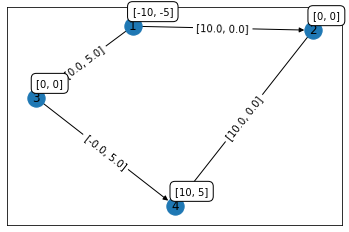

In [26]:


# Plot solution
G_solution = nx.DiGraph()
for i in nodes:
    G_solution.add_node(i)
for i, j in arcs:
    G_solution.add_edge(i, j, capacity=f"{[f[i, j, k].x for k in commodities]}")
nx.draw_networkx_nodes(G_solution, pos)
nx.draw_networkx_labels(G_solution, pos)
nx.draw_networkx_edges(G_solution, pos)
labels_solution = nx.get_edge_attributes(G_solution, 'capacity')
nx.draw_networkx_edge_labels(G_solution, pos, edge_labels=labels_solution)
for i in nodes:
    plt.text(pos[i][0], pos[i][1] + 0.1, f"{[demands[i, k] for k in commodities] }", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()
